<a href="https://colab.research.google.com/github/Gonza2981/Sistema-de-clasificacion-TREE-con-pipeline-y-Gridsearch/blob/main/Sistema_clasificacion_Tree_with_pipe_and_Gridsearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo del trabajo
### En este proyecto, trabajaremos con un dataset que contiene información sobre personas. La idea es predecir si la persona tiene o no un salario anual mayor a 50K dólares.


Procedemos a importar las librerias que utilizaremos para realizar el analisis:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

Importamos el df del CSV entregado.
Para esto montamos el google Drive y luego nuestra unidad de Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Curso Data Science - Icaro/Unidad 2/Entrega Sprint 1/train.csv')

Observamos los datos del DataFrame.

In [4]:
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


Primero observemos cuantas filas y columnas tiene nuestro DF:

In [5]:
  df.shape

(27656, 16)

Observamos que el dataframe que vamos a analizar contiene 27656 datos. Los features que intervienen en el mismo son:

1. Index / ID (identificador) - Variables numericas.
2. Age (Edad) - Variable numerica.
3. Workclass (Tipo de trabajo) - Variable categorica.
4. Education (Nivel de estudios) - Variable categorica.
5. education.num (Numero relacionado a Nivel del educacion) - Variable numerica.
6. marital.status (Estado civil) - Variable categorica.
7. ocupation (Trabajo u oficio) - Variable categorica.
8. relationship (relacion) - Variable categorica.
9. race (Raza) - Variable categorica.
10. sex (Sexo) - Variable categorica
11. capital.gain (capital ganado) - Varible numerica
12. capital.loss (capital perdido) - Variable numerica
13. hours.per.week (horas de trabajo por semana) - Variable numerica.
14. native.country (Nacionalidad) - Variable categorica
15. Income (ingreso) - **variable a predecir**

Vemos que la variable a predecir nos indica que se trata de un **problema de clasificacion**, ya que la variable que queremos predecir en base a las diferentes caracteristicas que nos provee el dataframe tiene 2 posibles valores (gana igual o mas de 50k dolares o no gana mas de 50k dolares)

Observemos las variables numéricas:

In [6]:
df.describe()

,index,age,education.num,capital.gain,capital.loss,hours.per.week,ID
count,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000
mean,16274.894851,38.610356,10.093506,1099.991503,88.284387,40.446666,16267.565736
std,9410.041750,13.659928,2.566083,7487.323462,405.821328,12.369212,9403.092602
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8104.750000,28.000000,9.000000,0.000000,0.000000,40.000000,8104.750000
50%,16296.000000,37.000000,10.000000,0.000000,0.000000,40.000000,16291.000000
75%,24431.250000,48.000000,12.000000,0.000000,0.000000,45.000000,24416.250000
max,32559.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000,32535.000000


Vemos que tenemos 7 features del tipo numerico, en cada una de estas features se puede analizar los valores entregados. Por ejemplo en la edad nos da una media de 37 años y vemos que el valor máximo es de 90 lo que nos da una pauta que puede haber Outliner que hay que anlizarlo a traves de graficos, que lo haremos mas adelante

Observamos las variables categoricas

In [7]:
df.describe(include='O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,27656,27656,27656,27656,27656,27656,27656,27656,27656
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,19279,8934,12720,3539,11208,23621,18521,24811,20953


Analizamos que hay 8 features categoricas mas la variable de target que tambien esta como categorica. Anlizamos lo cantidad de cada feature los unique en caso que tengamos que hacer OHE y lo valores que mas se repiten en cada feature

Observemos si tenemos valores nulos

In [8]:
df.isnull().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
ID                0
dtype: int64

En principio obvservamos que en ninguna de los feature tiene valores nulos por lo tanto en principio no tendremos que imputar valores faltantes.

# BASELINE
### Vamos a relizar un base line con los valore numericos antes de procesar el resto de los features

Primero tenemos que normalizar la feature "Income"

In [9]:
yb = df['income'].apply(lambda x: 1 if x=='>50K' else 0)

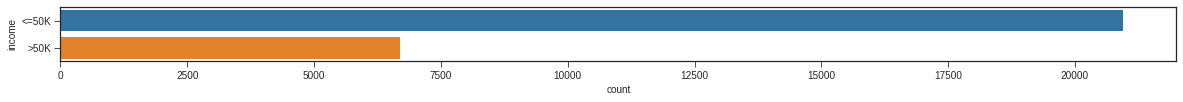

In [10]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="income", data=df)

Luego de obtener la columna de target en 0 y 1, 0 es para les personas que ganan menos o igual a 50K al año y 1 es para las personas que ganan mas de 50K al año.
Ahora vamos a obtener las features numericas para realizar el baseline

In [11]:
Xb = df.select_dtypes('number')

Importamos para hacer la funcion para hacer un train test split de Xb e yB

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.2 , stratify=yb)

Obervamos las filas y columnas de los distintos df del baseline

In [14]:
Xb_train.shape

(22124, 7)

In [15]:
Xb_test.shape

(5532, 7)

In [16]:
yb_train.shape

(22124,)

In [17]:
yb_test.shape

(5532,)

### En primer termino definimos que es un problema de clasificación y no de regresión. Por lo tanto tenemos dos alternativas para trabajar.Vamos a optar realizar el BASELINE un arbol de clasificación en lugar de un KNN ya que este ultimo es mas suseptible al los valores outlines y todavia no tratamos ninguno de los features

In [18]:
from sklearn.tree import DecisionTreeClassifier

Definimos el hiperparametro de profundidad del tree en 3

In [19]:
tree_b = DecisionTreeClassifier(max_depth= 3)

Entrenamos el tree con X e y de train

In [20]:
tree_b.fit(Xb_train,yb_train)

DecisionTreeClassifier(max_depth=3)

Obtenemos las prediciones de train y de test

In [21]:
y_pred_train_b = tree_b.predict(Xb_train)
y_pred_test_b = tree_b.predict(Xb_test)

Importamos la metrica de accuaracy para medir la precision de nuestro BASELINE

In [22]:
from sklearn.metrics import accuracy_score

Calulcamos los accuaracy de train y de test

In [23]:
accuracy_score(yb_train, y_pred_train_b)

0.807946121858615

In [24]:
accuracy_score(yb_test, y_pred_test_b)

0.8013376717281273

##Como conclusion de este BASE LINE, sin haber echo tratamiento a ninguna features y solo con los valores numericos de base se obtiene un valor bastante acceptable de precision.

# Vamos a trabajar con los features del DF

## Primero lo vamos a hacer con las variables numericas

In [25]:
df.describe()

,index,age,education.num,capital.gain,capital.loss,hours.per.week,ID
count,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000,27656.000000
mean,16274.894851,38.610356,10.093506,1099.991503,88.284387,40.446666,16267.565736
std,9410.041750,13.659928,2.566083,7487.323462,405.821328,12.369212,9403.092602
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8104.750000,28.000000,9.000000,0.000000,0.000000,40.000000,8104.750000
50%,16296.000000,37.000000,10.000000,0.000000,0.000000,40.000000,16291.000000
75%,24431.250000,48.000000,12.000000,0.000000,0.000000,45.000000,24416.250000
max,32559.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000,32535.000000


Vamos a graficar la distribucion de cada variable y tambien un box plot de las mismas para verificar si se observan outliers

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

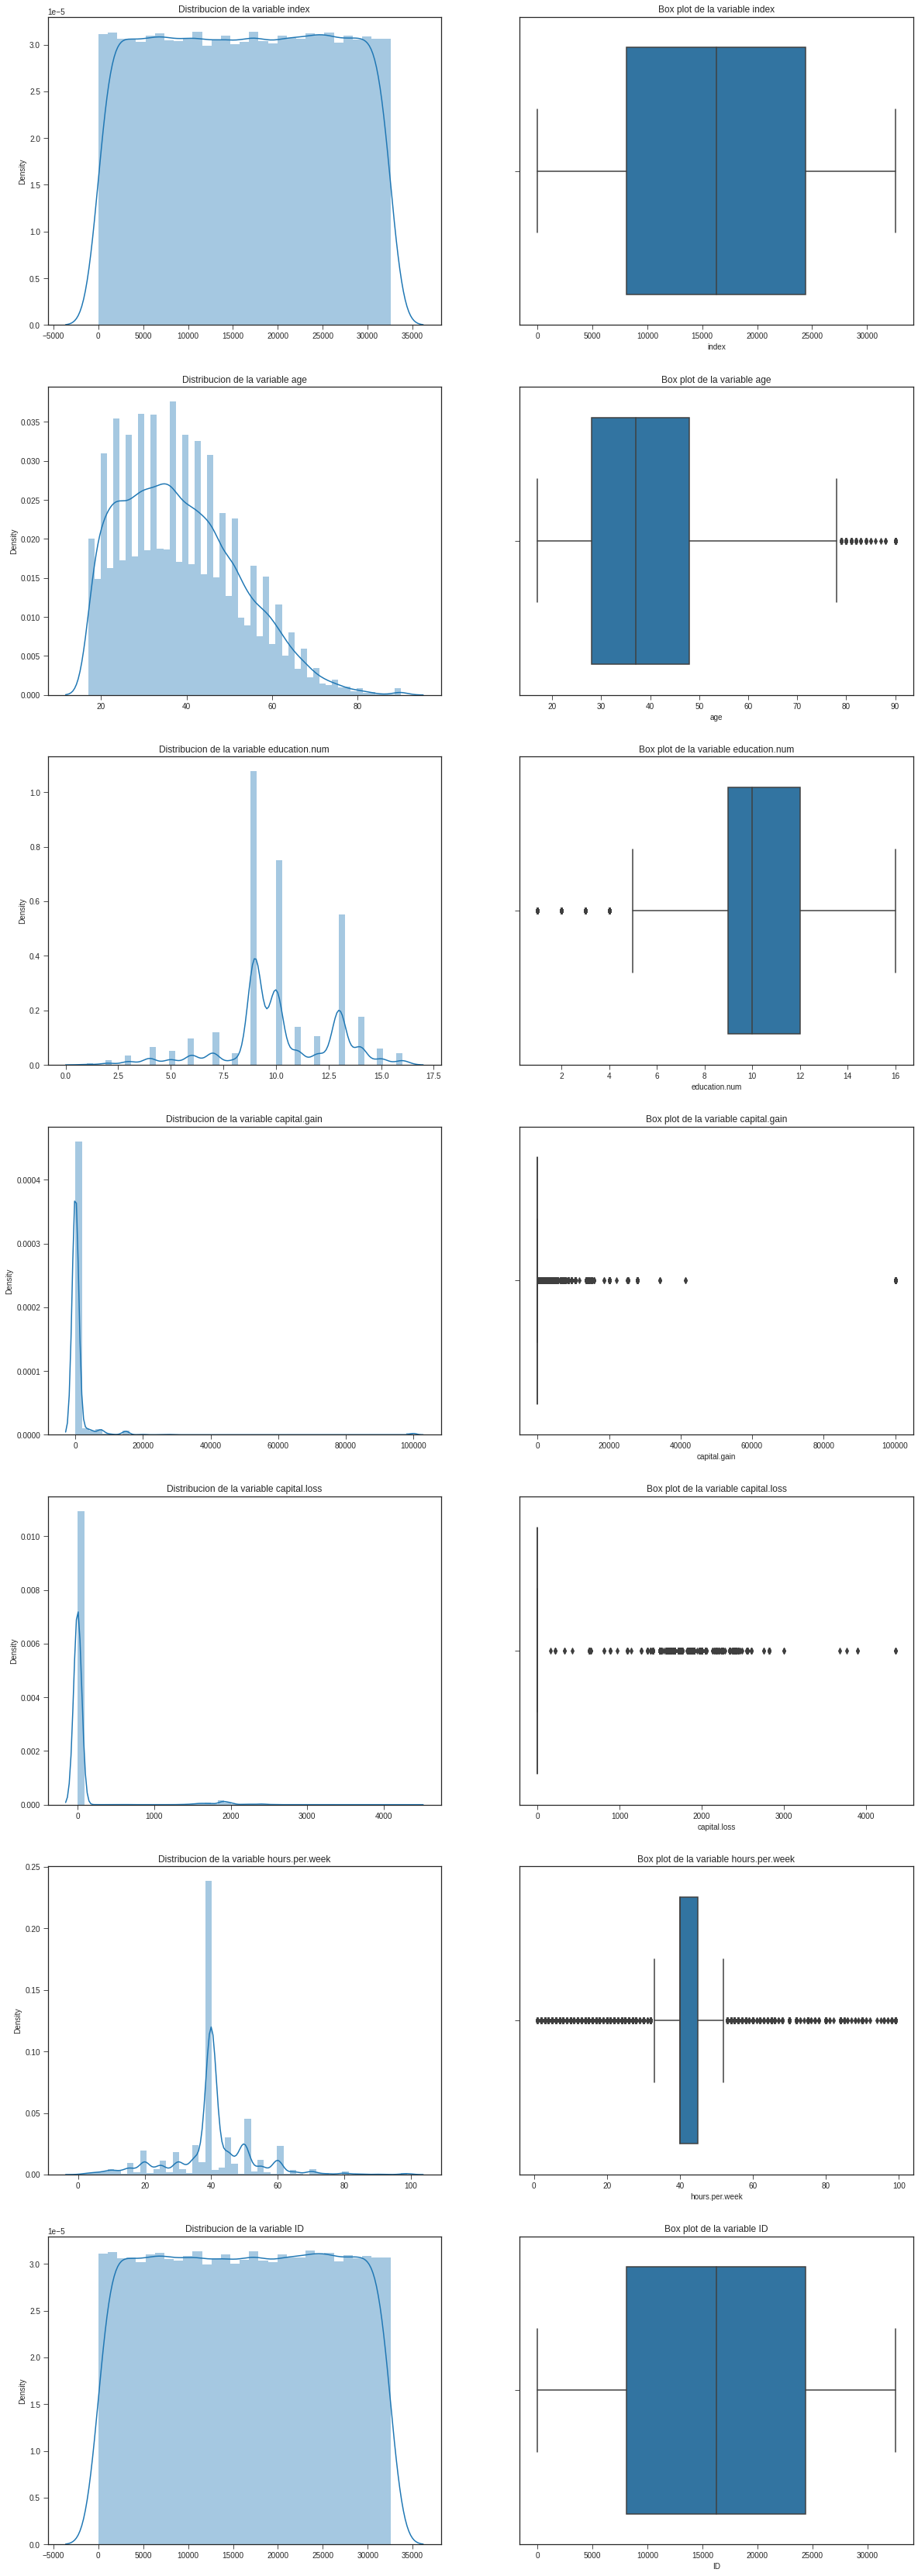

In [26]:
columnas = df.select_dtypes('number').columns
fig, axes = plt.subplots(nrows = len(columnas), ncols=2, figsize=(20,60))

for index, col in enumerate (columnas):
  axes[index][0].set_title(f'Distribucion de la variable {col}')
  sns.distplot (x=df[col], ax=axes[index][0])

  axes[index][1].set_title(f'Box plot de la variable {col}')
  sns.boxplot (x=df[col], ax=axes[index][1])

plt.show()

  Analizando los graficos como primera conclusion y obvia vemos que tanto la frature INDEX como ID son features uniformes.
  Luego vemos la feature AGE que tiene un distribución asimetrica, lo cual es logico ya que a medida que la edad aumenta hay menos trabajadores activos. Los valores extremos en principio no lo consideraria OUTLINERS ya que pueden ser una feature que correlaciona bien con nuestro target.
  La feature EDUCATION.NUM es una serie que va de 1 a 16 y por lo que se observó cuando se analizaron las variables categoricas cada numero representa una variable de dicha columna. Cuando analizemos las variables categoricas lo vamos a confirmar.
  Las features Capital.gain com Capital.loss en principio es una variable que en su gran mayoria son valores en cero. Por lo tanto no logramos identrificar cuales serian si es que hay valores outliners. En las graficas de distribucion se observa que los pocos valores que hay estan muy concentrados en un pequeña porcion de la grafica. Vamos a observar en la correlación como se comporta con la feature target.
  La feature hours.per.week tiene un distribución bastante normalizada y deberia tener una buen correlación con la feature target. Considero no tomar como outliners los valores extremos.


## Vamos a ver la correlacion entre las diferentes feature numericas y vamos a agregar **income** que es la variable target para observar como se correlaciona.

In [27]:
df_num = df.select_dtypes('number')

In [28]:
df_num.shape

(27656, 7)

In [29]:
yb.shape

(27656,)

In [30]:
df_num = pd.concat([df_num, yb], axis=1)

In [31]:
df_num.corr

<bound method DataFrame.corr of        index  age  education.num  capital.gain  capital.loss  hours.per.week  \
0      24466   30              9             0             0              32   
1        985   37             13             0          1848              40   
2      30250   41              9             0             0              60   
3       7107   45             13             0             0              60   
4      27656   28              9             0             0              40   
...      ...  ...            ...           ...           ...             ...   
27651  29823   31              9             0             0              40   
27652   5390   51             11             0             0              40   
27653    860   55              9             0          1887              40   
27654  15800   23             13             0             0              25   
27655  23667   47             13             0             0              60   

       

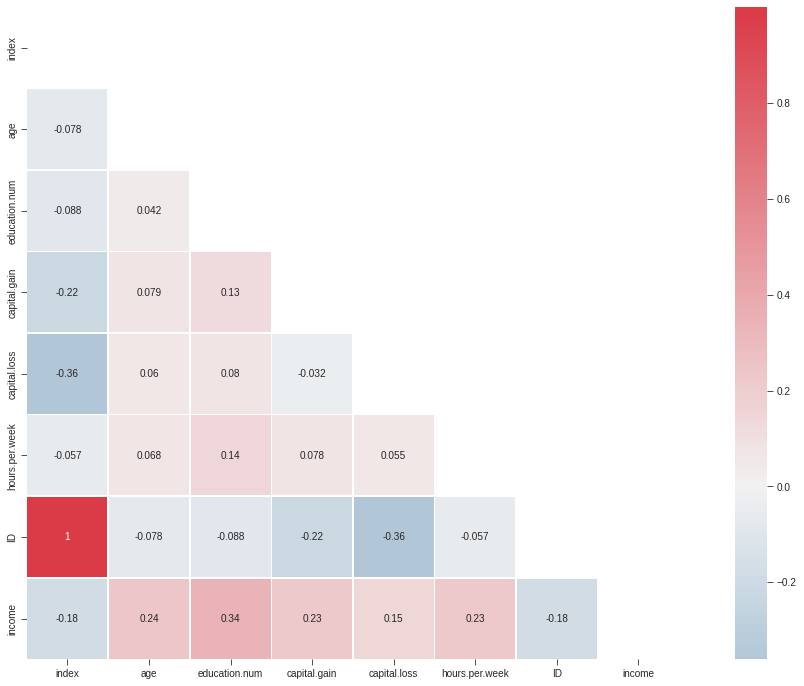

In [32]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_num.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

Lo primero que observamos es que entre la variable Index e ID hay una correlacion perfecta por lo tanto la feature index la vamos a eliminar para realizar la clasificacion. Entre el resto de las feature se observa poca correlacion, ya el valor maximo por ejemplo es 0.36.

Agregamos un grafico donde observamos como se correlaciona cada feature con la variable taret

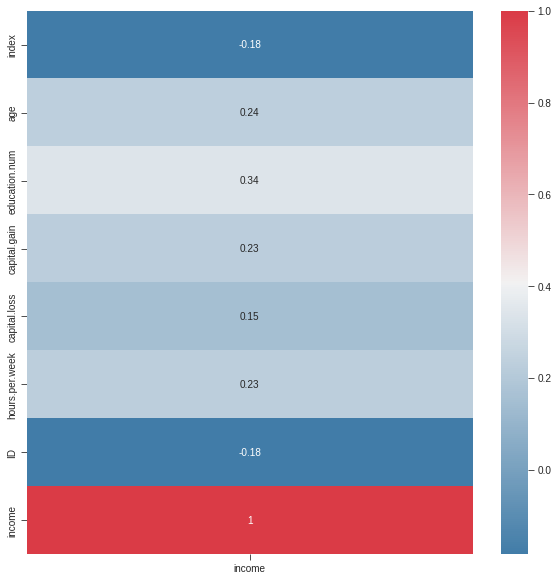

In [33]:
target_corr = pd.DataFrame(df_num.corr()['income'], index=df_num.corr().index)

plt.figure(figsize=(10,10))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

Vemos que la variable que mayor correlación tiene con **income** es **education.num** que igualmente tampoco es tan alta es solo **0.34**

### Como primera conclusion de las variables numericas solo vamos a eliminar la columna **index** que se correlaciona perfectamente con **ID**. El resto de las columnas las vamos a dejar sin alteraciones por las razones explicadas anteriormente.

## Ahora vamos a trabajar con las variables categoricas

In [34]:
df.describe(include='O')

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,27656,27656,27656,27656,27656,27656,27656,27656,27656
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,19279,8934,12720,3539,11208,23621,18521,24811,20953


Graficamos las variables categoricas en sus distintas alternativas y respecto al income

Analizamos primero la variable **workclass**

In [35]:
df.workclass.value_counts()/df.shape[0]*100

Private             69.710009
Self-emp-not-inc     7.795777
Local-gov            6.396442
?                    5.564796
State-gov            4.038907
Self-emp-inc         3.445907
Federal-gov          2.972230
Without-pay          0.050622
Never-worked         0.025311
Name: workclass, dtype: float64

Primero vamos a remplazar los trabajo que figuran ? por 'Sin Informacion', no los eliminaria del dataset ya que representan el 5,5% de la información. Por lo tanto vamos a remplazar los valores ? por 'Sin informacion'

In [36]:
df['workclass'] = df['workclass'].apply(lambda x: 'Sin informacion' if x=="?" else x)

A esta feature le haria un OHE para poder pasar al modo numerico. Al final del analisis de todas las feaures vamos realizar un funciona y hacer el OHE a todas las feature que lo requieran juntas.

Analizamos la feature **education**

Vamos a verificar la correlación entre la feature **education** y la feature **education.num**

In [37]:
df.groupby('education') ['education.num'].value_counts()

education     education.num
10th          6                 794
11th          7                 982
12th          8                 365
1st-4th       2                 139
5th-6th       3                 275
7th-8th       4                 535
9th           5                 429
Assoc-acdm    12                886
Assoc-voc     11               1147
Bachelors     13               4583
Doctorate     16                352
HS-grad       9                8934
Masters       14               1474
Preschool     1                  43
Prof-school   15                495
Some-college  10               6223
Name: education.num, dtype: int64

Como se observa **education.num** es una codificación y con orden de nivel de estudio de la feature **education** por lo tanto podremos eliminar esta columna del dataset a analizar.

Continuamos con la feature **marital.status**

In [38]:
df['marital.status'].value_counts()

Married-civ-spouse       12720
Never-married             9065
Divorced                  3770
Widowed                    857
Separated                  857
Married-spouse-absent      366
Married-AF-spouse           21
Name: marital.status, dtype: int64

En esta feature vamos a aplicar la codificación OHE y de esta forma tendremos una sola columna que representará l a feature

Analizaremos la siguiente feature categorica **ocupation**

In [39]:
df.occupation.value_counts()/df.shape[0]*100

Prof-specialty       12.796500
Craft-repair         12.688024
Exec-managerial      12.474689
Adm-clerical         11.704513
Sales                11.082586
Other-service        10.030373
Machine-op-inspct     6.118021
?                     5.590107
Transport-moving      4.982644
Handlers-cleaners     4.201620
Farming-fishing       3.084322
Tech-support          2.773358
Protective-serv       2.014030
Priv-house-serv       0.433902
Armed-Forces          0.025311
Name: occupation, dtype: float64

Vamos a remplazar los valores ? por 'Sin Informacion'

In [40]:
df['occupation'] = df['occupation'].apply(lambda x: 'Sin informacion' if x=='?' else x)

In [41]:
df.occupation.nunique()

15

En esta feature tambien vamos a tener que realizar un OHE para codificar dicha feature

Segimos analizando la feature **realtioship**

In [42]:
df.relationship.value_counts()

Husband           11208
Not-in-family      7001
Own-child          4333
Unmarried          2944
Wife               1333
Other-relative      837
Name: relationship, dtype: int64

In [43]:
df.relationship.nunique()

6

Esta feature tambien la codificaremos con un OHE.

Continuamos con el analisis de la feature **race**

In [44]:
df['race'].value_counts()

White                 23621
Black                  2649
Asian-Pac-Islander      886
Amer-Indian-Eskimo      263
Other                   237
Name: race, dtype: int64

Esta feature sera codificada tambien con un OHE

Observamos la feature **sex**

In [45]:
df.sex.value_counts()

Male      18521
Female     9135
Name: sex, dtype: int64

Tambien haremos un OHE de esta feaure

Por ultimo analizamos la feature categorica **native.country**

In [46]:
df['native.country'].unique()

array(['United-States', '?', 'Jamaica', 'India', 'Mexico', 'Philippines',
       'Dominican-Republic', 'El-Salvador', 'China', 'Thailand',
       'Ireland', 'Laos', 'Iran', 'France', 'Guatemala', 'South',
       'Puerto-Rico', 'Japan', 'Portugal', 'Greece', 'Canada', 'Poland',
       'Peru', 'Cuba', 'Columbia', 'Germany', 'Italy', 'Hong', 'Haiti',
       'Ecuador', 'England', 'Nicaragua', 'Cambodia', 'Trinadad&Tobago',
       'Vietnam', 'Honduras', 'Taiwan', 'Scotland', 'Yugoslavia',
       'Hungary', 'Outlying-US(Guam-USVI-etc)', 'Holand-Netherlands'],
      dtype=object)

Vamos a imputar los valores '?' con 'Sin informacion'

In [47]:
df['native.country']= df['native.country'].apply(lambda x: 'Sin informacion' if x=='?' else x)

En esta feature tambien ralizaremos un OHE.

# Vamos a realizar un OHE en todas las feature categoricas

Como primer medida aplicamos el OHE en las feature categoricas antes de hacer train-test-split ya que no afecta el resultado hacerlo una sola vez antes de dividir los grupos o hacer el train y test.
Finalmente entonces eliminamos la columna education ya que esta codificado en la columna eduction.num y el resto de las columnas se realizara un One Hot Encoding; excepto la feature target 'Income'

In [48]:
df.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


In [49]:
df = pd.read_csv('/content/drive/MyDrive/Curso Data Science - Icaro/Unidad 2/Entrega Sprint 1/train_nuevo.csv')

In [50]:
df.shape

(27656, 16)

In [51]:
df_eda=df

In [52]:
df_eda['income'] = df_eda['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [53]:
df_eda['income'].value_counts()

0    20953
1     6703
Name: income, dtype: int64

In [54]:
df_eda.drop(['index','education','ID','native.country'], axis=1, inplace=True)

In [55]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline, make_union
from sklearn.base import BaseEstimator, TransformerMixin

In [56]:
class SelectColumns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [58]:
df_eda_cat = df_eda.select_dtypes('object')
df_eda_num = df_eda.select_dtypes('number')
df_eda_num = df_eda_num.drop(['income'],axis=1).copy()


In [59]:
cat_cols = df_eda_cat.columns
num_cols = df_eda_num.columns

In [60]:
cat_cols,num_cols

(Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
        'sex'],
       dtype='object'),
 Index(['age', 'education.num', 'capital.gain', 'capital.loss',
        'hours.per.week'],
       dtype='object'))

In [61]:
pipe = Pipeline([
    ("features", FeatureUnion([
        ('numeric', make_pipeline(SelectColumns(names=num_cols), StandardScaler())),
        ('categorical', make_pipeline(SelectColumns(names=cat_cols), OneHotEncoder(sparse=False, handle_unknown='ignore')))
    ])),
    ('model', DecisionTreeClassifier(random_state=0, max_depth=8))
])

In [62]:
df_eda.columns

Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income'],
      dtype='object')

In [63]:
X = df_eda.drop('income',axis=1)
y=df_eda['income']

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=20) 

In [66]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object'))),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('categorical',
                                                 Pipeline(steps=[('selectcolumns',
                                                                  SelectColumns(names=Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex'],
      dtype='object'))),
                                                                 ('onehotencoder',
                        

In [67]:
train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


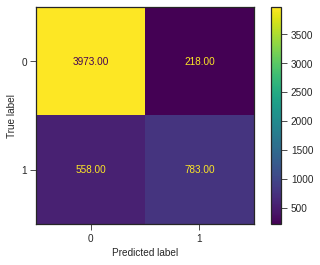

In [68]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
pipe.fit(X_train,y_train)

plot_confusion_matrix(pipe,X_test, y_test, values_format='.2f')

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pipe.predict(X_train)))
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     16762
           1       0.78      0.60      0.68      5362

    accuracy                           0.86     22124
   macro avg       0.83      0.77      0.79     22124
weighted avg       0.86      0.86      0.86     22124

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4191
           1       0.78      0.58      0.67      1341

    accuracy                           0.86      5532
   macro avg       0.83      0.77      0.79      5532
weighted avg       0.85      0.86      0.85      5532



In [70]:
from sklearn.model_selection import cross_val_score
pipe_scores = cross_val_score(pipe, X_train, y_train, cv=10)
pipe_scores

array([0.85314053, 0.84862178, 0.85359241, 0.8463624 , 0.84403255,
       0.84719711, 0.85940325, 0.86256781, 0.85533454, 0.85216998])

In [71]:
pipe_scores.mean()

0.852242237019617

#Importamos el CSV de test

In [72]:
df_test = pd.read_csv('/content/drive/MyDrive/Curso Data Science - Icaro/Unidad 2/Entrega Sprint 1/test_nuevo.csv')

In [73]:
df_test.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ID
0,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,3643
1,16041,18,?,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,16036
2,9403,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,9401
3,17909,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,17903
4,5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,5198


Verificamos la cantidad de filas y columnas que tiene el mismo

In [74]:
df_test.shape

(4881, 15)

Observamos que tiene menor cantidad de valores que el csv de train, pero la cantidad de columnas son iguales

Verificamos que no tenga valores nulos

In [75]:
df_test.isnull().sum()

index             0
age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
ID                0
dtype: int64

Observamos que hay varios valores en ? y como hicimos en el csv de train lo reemplazaremos por el valor 'Sin informacion'

In [76]:
df_test.replace('?','Sin informacion',inplace=True)

In [77]:
ID = df_test['ID']

In [78]:
df_test.drop(['index','education','ID','native.country'], axis=1, inplace=True)

In [79]:
df_test.shape

(4881, 11)

In [80]:
X_train.shape

(22124, 11)

## Entonces ahora que tenemos igualados el X_train y df_test en la misma cantidad de columnas. Podemos aplicar un metodo de clasificación para obtener los resultados.

Entonces calculamos las prediciones del df_test

In [81]:
income_test = pipe.predict(df_test)

Ahora agregamos  la columna de valores predecidos a df_test

Y por ultimo filtramos las 2 columnas que hay que exportar en el CSV como resultado. 'ID' y 'PRED'

In [82]:
df_test['PRED'] = income_test

In [83]:
df_test['ID'] = ID

In [84]:
df_test[['ID','PRED']].sort_values('PRED', ascending=False)

,ID,PRED
1340,6011,1
1811,936,1
4314,30563,1
672,18212,1
3068,24047,1
...,...,...
1779,11607,0
1780,31563,0
1781,29166,0
1782,20532,0


In [85]:
df_test['PRED'].value_counts()

0    4009
1     872
Name: PRED, dtype: int64

Y por ultimo generamos el CSV con los valores PRED e ID, pero eliminando el valor de index generado por Pandas.

In [86]:
df_test[['ID','PRED']].sort_values('PRED', ascending=False).to_csv('/content/drive/MyDrive/Curso Data Science - Icaro/Unidad 2/Entrega Sprint 1/pipe.csv', index=False,)

#Vamos a aplicar GridSearch para obtener los mejores hiperparametros

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
parameters = {
    'model__max_depth': [3,5,8,12],
    'model__min_samples_split': [1, 2, 3, 4, 5, 6],
    'model__min_samples_leaf': [1,2,3,4]
}

In [89]:
gridsearch = GridSearchCV(pipe, parameters, n_jobs=-1)
gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/s

GridSearchCV(estimator=Pipeline(steps=[('features',
                                        FeatureUnion(transformer_list=[('numeric',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object'))),
                                                                                        ('standardscaler',
                                                                                         StandardScaler())])),
                                                                       ('categorical',
                                                                        Pipeline(steps=[('selectcolumns',
                                                                                         SelectColumns(names=In...ss', 'marit

In [90]:
gridsearch.best_params_

{'model__max_depth': 8,
 'model__min_samples_leaf': 4,
 'model__min_samples_split': 2}

In [91]:
train_preds = gridsearch.predict(X_train)
test_preds = gridsearch.predict(X_test)

In [92]:
gridsearch.score(X_train, y_train)

0.8606490688844693

In [93]:
gridsearch.score(X_test, y_test)

0.8604483007953724

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


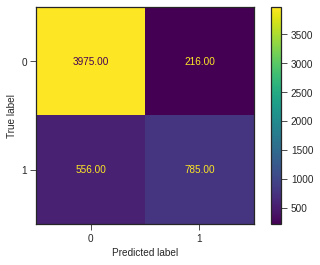

In [94]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
pipe.fit(X_train,y_train)

plot_confusion_matrix(gridsearch,X_test, y_test, values_format='.2f')

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_train, gridsearch.predict(X_train)))
print(classification_report(y_test, gridsearch.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     16762
           1       0.78      0.60      0.68      5362

    accuracy                           0.86     22124
   macro avg       0.83      0.77      0.79     22124
weighted avg       0.85      0.86      0.85     22124

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4191
           1       0.78      0.59      0.67      1341

    accuracy                           0.86      5532
   macro avg       0.83      0.77      0.79      5532
weighted avg       0.85      0.86      0.85      5532



##importamos nuevamente el CSV de test

In [96]:
df_test = pd.read_csv('/content/drive/MyDrive/Curso Data Science - Icaro/Unidad 2/Entrega Sprint 1/test.csv')

In [97]:
df_test.replace('?','Sin informacion',inplace=True)
df_test.drop(['index','education'], axis=1, inplace=True)

In [98]:
income_test = gridsearch.predict(df_test)

In [99]:
df_test['PRED'] = income_test
df_test[['ID','PRED']].sort_values('PRED', ascending=False)

,ID,PRED
1340,6011,1
3185,14757,1
3191,3106,1
905,96,1
3187,2041,1
...,...,...
1779,11607,0
1780,31563,0
1781,29166,0
1782,20532,0


In [100]:
df_test['PRED'].value_counts()

0    4009
1     872
Name: PRED, dtype: int64

In [101]:
df_test[['ID','PRED']].sort_values('PRED', ascending=False).to_csv('/content/drive/MyDrive/Curso Data Science - Icaro/Unidad 2/Entrega Sprint 1/resultado_final_gridsearchV4.csv', index=False,)